In [285]:
!pip install lifelines
!pip install sklearn
!pip install statsmodels
#!pip uninstall tensorflow tensorflow-federated -y
#!pip install tensorflow-federated
!pip install --upgrade tensorflow tensorflow-federated

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_federated-0.33.0-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl.metadata (9.8 kB)
  Using cached cachetools-3.1.1-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached farmhashpy-0.4.0.tar.gz (98 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached grpcio-1.46.5.tar.gz (21.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of tensorflow-federated to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_federated-0.32.0-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached tensorflow_federated-0.31.0-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached tensor

# Sample task Asthma progression

In [286]:
# import packages 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


import statsmodels.api as sm
import lifelines
from lifelines import KaplanMeierFitter, CoxPHFitter

import tensorflow as tf
import tensorflow_federated as tff
import collections

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [157]:
#import data
df1 = pd.read_json(r'C:\Users\Olga_\OneDrive\Documents\Olga Documents\my projects and summary\sample tasks\asthma_hospital_1.json', orient ="records", lines = True)
df2 = pd.read_json(r'C:\Users\Olga_\OneDrive\Documents\Olga Documents\my projects and summary\sample tasks\asthma_hospital_2.json', orient ="records", lines = True)
df3 = pd.read_json(r'C:\Users\Olga_\OneDrive\Documents\Olga Documents\my projects and summary\sample tasks\asthma_hospital_3.json', orient ="records", lines = True)

db_combined = pd.concat([df1,df2,df3],ignore_index=True)

# display
#display(df1)
#display(df2)
#display(df3)
display(db_combined)
# basic characteristics 
print(db_combined.info())
#print(db_combined.describe())
#print(db_combined.isnull().sum())

,Patient_ID,Gender,Age,Birth_Date,Death_Date,Last_Observation_Date,Asthma_Diagnosis_Date,HB_Level,WBC_Count,FEV1_Level,COPD_Diagnosis_Date,Obesity_Diagnosis_Date,Hypertension_Diagnosis_Date,GERD_Diagnosis_Date,Diabetes_Diagnosis_Date,Wheezing_Diagnosis_Date,Shortness of breath_Diagnosis_Date,Cough_Diagnosis_Date,Chest tightness_Diagnosis_Date
0,P0001,F,57,1967-11-28T17:38:04.017,None,2024-03-21T17:38:04.027,None,12.2,7.5,75.5,None,1998-07-27T17:38:04.017,None,None,None,None,None,None,2023-11-02T17:38:04.017
1,P0002,F,81,1943-05-05T17:38:04.017,None,2024-09-21T17:38:04.027,1982-10-17T17:38:04.017,12.8,4.7,88.2,2010-06-28T17:38:04.017,1990-11-28T17:38:04.017,2011-09-19T17:38:04.017,None,1973-05-08T17:38:04.017,1987-06-24T17:38:04.017,1979-04-27T17:38:04.017,2005-10-01T17:38:04.017,None
2,P0003,M,53,1971-12-24T17:38:04.017,None,2024-05-03T17:38:04.027,2008-02-24T17:38:04.017,10.6,8.8,77.4,None,2017-06-26T17:38:04.017,None,None,2006-12-05T17:38:04.017,2013-09-24T17:38:04.017,None,None,None
3,P0004,M,32,1992-06-20T17:38:04.017,None,2024-07-24T17:38:04.027,2023-04-25T17:38:04.017,12.6,4.9,61.5,None,None,None,None,None,None,None,None,None
4,P0005,F,31,1993-09-15T17:38:04.017,None,2024-04-04T17:38:04.027,None,14.3,7.0,93.4,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,P0329,F,63,1961-11-10T17:38:04.019,None,2024-04-22T17:38:04.029,2008-10-26T17:38:04.019,13.8,5.7,104.7,None,None,None,2008-04-13T17:38:04.019,None,None,2021-09-20T17:38:04.019,None,None
329,P0330,M,86,1938-10-21T17:38:04.019,2012-05-15T17:38:04.019,None,1989-11-05T17:38:04.019,12.6,6.3,88.8,None,None,None,None,None,1993-03-01T17:38:04.019,None,None,2003-11-14T17:38:04.019
330,P0331,M,47,1977-12-11T17:38:04.019,None,2024-02-27T17:38:04.029,2015-05-12T17:38:04.019,11.3,8.3,60.1,None,None,2013-11-25T17:38:04.019,None,None,None,None,None,2012-07-14T17:38:04.019
331,P0332,M,47,1977-08-30T17:38:04.019,None,2024-03-02T17:38:04.029,None,14.0,5.2,86.7,None,None,None,None,2018-07-31T17:38:04.019,None,2015-03-04T17:38:04.019,2015-08-19T17:38:04.019,None


,Patient_ID,Gender,Age,Birth_Date,Death_Date,Last_Observation_Date,Asthma_Diagnosis_Date,HB_Level,WBC_Count,FEV1_Level,COPD_Diagnosis_Date,Obesity_Diagnosis_Date,Hypertension_Diagnosis_Date,GERD_Diagnosis_Date,Diabetes_Diagnosis_Date,Wheezing_Diagnosis_Date,Shortness of breath_Diagnosis_Date,Cough_Diagnosis_Date,Chest tightness_Diagnosis_Date
0,P0334,F,49,1975-08-03T17:38:04.019,None,2024-08-31T17:38:04.029,None,13.8,9.8,72.3,None,None,None,None,None,2010-09-27T17:38:04.019,None,2012-11-05T17:38:04.019,None
1,P0335,M,59,1965-06-14T17:38:04.019,2020-11-02T17:38:04.019,None,None,15.3,6.6,59.7,None,None,2001-08-10T17:38:04.019,1995-10-03T17:38:04.019,2015-12-04T17:38:04.019,2017-10-21T17:38:04.019,None,2008-01-30T17:38:04.019,1996-10-11T17:38:04.019
2,P0336,F,51,1973-05-20T17:38:04.019,None,2024-09-09T17:38:04.029,None,15.2,6.1,97.1,None,None,None,None,None,None,None,2005-07-30T17:38:04.019,None
3,P0337,M,47,1977-04-09T17:38:04.019,None,2024-03-14T17:38:04.029,2016-07-12T17:38:04.019,13.2,5.9,72.4,None,None,None,2015-06-06T17:38:04.019,None,None,2011-12-03T17:38:04.019,None,2012-10-27T17:38:04.019
4,P0338,M,40,1984-10-26T17:38:04.019,None,2024-05-08T17:38:04.029,None,12.5,7.2,84.9,None,None,None,None,None,None,None,None,2021-09-10T17:38:04.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,P0662,M,41,1983-08-01T17:38:04.022,None,2024-10-04T17:38:04.031,2017-08-15T17:38:04.022,15.5,7.9,67.2,None,None,None,None,None,2015-04-08T17:38:04.022,2015-12-21T17:38:04.022,None,None
329,P0663,F,74,1950-07-25T17:38:04.022,None,2024-03-14T17:38:04.031,2012-08-11T17:38:04.022,12.6,6.4,82.8,None,None,None,2015-01-13T17:38:04.022,None,None,None,None,2003-12-19T17:38:04.022
330,P0664,F,35,1989-06-10T17:38:04.022,None,2024-05-09T17:38:04.031,None,12.6,4.3,97.8,None,None,None,None,None,None,None,None,None
331,P0665,M,81,1943-06-15T17:38:04.022,None,2024-08-26T17:38:04.031,2012-05-30T17:38:04.022,12.5,3.7,79.5,None,None,1993-09-28T17:38:04.022,None,None,1995-11-14T17:38:04.022,None,1996-07-17T17:38:04.022,1990-02-01T17:38:04.022


,Patient_ID,Gender,Age,Birth_Date,Death_Date,Last_Observation_Date,Asthma_Diagnosis_Date,HB_Level,WBC_Count,FEV1_Level,COPD_Diagnosis_Date,Obesity_Diagnosis_Date,Hypertension_Diagnosis_Date,GERD_Diagnosis_Date,Diabetes_Diagnosis_Date,Wheezing_Diagnosis_Date,Shortness of breath_Diagnosis_Date,Cough_Diagnosis_Date,Chest tightness_Diagnosis_Date
0,P0667,M,76,1948-07-20T17:38:04.022,None,2024-10-18T17:38:04.031,1989-08-11T17:38:04.022,11.7,9.6,60.6,1979-04-17T17:38:04.022,1990-10-27T17:38:04.022,None,None,None,2002-06-08T17:38:04.022,2014-11-24T17:38:04.022,None,2003-06-16T17:38:04.022
1,P0668,F,55,1969-05-22T17:38:04.022,None,2024-08-28T17:38:04.031,2011-12-29T17:38:04.022,12.8,4.5,71.7,None,None,None,None,None,None,None,None,None
2,P0669,F,59,1965-06-23T17:38:04.022,None,2024-06-13T17:38:04.031,2015-05-12T17:38:04.022,16.0,5.6,64.5,None,None,None,None,None,1997-03-18T17:38:04.022,None,None,2006-03-12T17:38:04.022
3,P0670,F,49,1975-12-10T17:38:04.022,None,2024-05-19T17:38:04.031,2020-09-15T17:38:04.022,13.2,5.4,70.4,None,None,None,None,None,None,None,None,None
4,P0671,M,51,1973-04-21T17:38:04.022,None,2024-07-02T17:38:04.031,None,15.9,6.4,77.6,None,None,None,2005-10-01T17:38:04.022,None,None,None,None,2007-03-03T17:38:04.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,P0996,M,66,1959-03-04T17:38:04.024,None,2024-09-24T17:38:04.032,1989-12-17T17:38:04.024,14.4,11.0,109.9,None,None,2009-05-15T17:38:04.024,2020-05-10T17:38:04.024,None,None,1991-08-07T17:38:04.024,None,None
330,P0997,F,81,1943-06-05T17:38:04.024,None,2024-07-25T17:38:04.032,1985-08-24T17:38:04.024,12.7,4.4,90.0,None,None,1986-07-21T17:38:04.024,2004-03-14T17:38:04.024,None,2004-07-16T17:38:04.024,1975-11-29T17:38:04.024,1995-08-05T17:38:04.024,None
331,P0998,F,72,1952-08-23T17:38:04.024,None,2024-09-16T17:38:04.032,2009-01-28T17:38:04.024,13.0,7.0,75.1,None,None,None,None,None,2018-01-18T17:38:04.024,2001-02-08T17:38:04.024,None,2007-03-22T17:38:04.024
332,P0999,F,68,1956-08-05T17:38:04.024,None,2024-11-10T17:38:04.032,None,14.7,11.2,69.8,None,None,2013-03-16T17:38:04.024,None,2014-04-12T17:38:04.024,None,None,2001-02-16T17:38:04.024,1995-12-07T17:38:04.024


,Patient_ID,Gender,Age,Birth_Date,Death_Date,Last_Observation_Date,Asthma_Diagnosis_Date,HB_Level,WBC_Count,FEV1_Level,COPD_Diagnosis_Date,Obesity_Diagnosis_Date,Hypertension_Diagnosis_Date,GERD_Diagnosis_Date,Diabetes_Diagnosis_Date,Wheezing_Diagnosis_Date,Shortness of breath_Diagnosis_Date,Cough_Diagnosis_Date,Chest tightness_Diagnosis_Date
0,P0001,F,57,1967-11-28T17:38:04.017,None,2024-03-21T17:38:04.027,None,12.2,7.5,75.5,None,1998-07-27T17:38:04.017,None,None,None,None,None,None,2023-11-02T17:38:04.017
1,P0002,F,81,1943-05-05T17:38:04.017,None,2024-09-21T17:38:04.027,1982-10-17T17:38:04.017,12.8,4.7,88.2,2010-06-28T17:38:04.017,1990-11-28T17:38:04.017,2011-09-19T17:38:04.017,None,1973-05-08T17:38:04.017,1987-06-24T17:38:04.017,1979-04-27T17:38:04.017,2005-10-01T17:38:04.017,None
2,P0003,M,53,1971-12-24T17:38:04.017,None,2024-05-03T17:38:04.027,2008-02-24T17:38:04.017,10.6,8.8,77.4,None,2017-06-26T17:38:04.017,None,None,2006-12-05T17:38:04.017,2013-09-24T17:38:04.017,None,None,None
3,P0004,M,32,1992-06-20T17:38:04.017,None,2024-07-24T17:38:04.027,2023-04-25T17:38:04.017,12.6,4.9,61.5,None,None,None,None,None,None,None,None,None
4,P0005,F,31,1993-09-15T17:38:04.017,None,2024-04-04T17:38:04.027,None,14.3,7.0,93.4,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,M,66,1959-03-04T17:38:04.024,None,2024-09-24T17:38:04.032,1989-12-17T17:38:04.024,14.4,11.0,109.9,None,None,2009-05-15T17:38:04.024,2020-05-10T17:38:04.024,None,None,1991-08-07T17:38:04.024,None,None
996,P0997,F,81,1943-06-05T17:38:04.024,None,2024-07-25T17:38:04.032,1985-08-24T17:38:04.024,12.7,4.4,90.0,None,None,1986-07-21T17:38:04.024,2004-03-14T17:38:04.024,None,2004-07-16T17:38:04.024,1975-11-29T17:38:04.024,1995-08-05T17:38:04.024,None
997,P0998,F,72,1952-08-23T17:38:04.024,None,2024-09-16T17:38:04.032,2009-01-28T17:38:04.024,13.0,7.0,75.1,None,None,None,None,None,2018-01-18T17:38:04.024,2001-02-08T17:38:04.024,None,2007-03-22T17:38:04.024
998,P0999,F,68,1956-08-05T17:38:04.024,None,2024-11-10T17:38:04.032,None,14.7,11.2,69.8,None,None,2013-03-16T17:38:04.024,None,2014-04-12T17:38:04.024,None,None,2001-02-16T17:38:04.024,1995-12-07T17:38:04.024


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient_ID                          1000 non-null   object 
 1   Gender                              1000 non-null   object 
 2   Age                                 1000 non-null   int64  
 3   Birth_Date                          1000 non-null   object 
 4   Death_Date                          111 non-null    object 
 5   Last_Observation_Date               889 non-null    object 
 6   Asthma_Diagnosis_Date               463 non-null    object 
 7   HB_Level                            1000 non-null   float64
 8   WBC_Count                           1000 non-null   float64
 9   FEV1_Level                          1000 non-null   float64
 10  COPD_Diagnosis_Date                 249 non-null    object 
 11  Obesity_Diagnosis_Date              263 non-

In [7]:
# convert dates to datetime format:
col_names = df1.columns.tolist()
display(col_names)
date_cols =  ['Birth_Date',
 'Death_Date',
 'Asthma_Diagnosis_Date',
 'COPD_Diagnosis_Date',
 'Obesity_Diagnosis_Date',
 'Hypertension_Diagnosis_Date',
 'GERD_Diagnosis_Date',
 'Diabetes_Diagnosis_Date',
 'Wheezing_Diagnosis_Date',
 'Shortness of breath_Diagnosis_Date',
 'Cough_Diagnosis_Date',
 'Chest tightness_Diagnosis_Date']

#display(date_cols)

db_combined[date_cols] = db_combined[date_cols].apply(lambda x: pd.to_datetime(x,errors='coerce').dt.date)

display(db_combined)

['Patient_ID',
 'Gender',
 'Age',
 'Birth_Date',
 'Death_Date',
 'Last_Observation_Date',
 'Asthma_Diagnosis_Date',
 'HB_Level',
 'WBC_Count',
 'FEV1_Level',
 'COPD_Diagnosis_Date',
 'Obesity_Diagnosis_Date',
 'Hypertension_Diagnosis_Date',
 'GERD_Diagnosis_Date',
 'Diabetes_Diagnosis_Date',
 'Wheezing_Diagnosis_Date',
 'Shortness of breath_Diagnosis_Date',
 'Cough_Diagnosis_Date',
 'Chest tightness_Diagnosis_Date']

,Patient_ID,Gender,Age,Birth_Date,Death_Date,Last_Observation_Date,Asthma_Diagnosis_Date,HB_Level,WBC_Count,FEV1_Level,COPD_Diagnosis_Date,Obesity_Diagnosis_Date,Hypertension_Diagnosis_Date,GERD_Diagnosis_Date,Diabetes_Diagnosis_Date,Wheezing_Diagnosis_Date,Shortness of breath_Diagnosis_Date,Cough_Diagnosis_Date,Chest tightness_Diagnosis_Date
0,P0001,F,57,1967-11-28,NaT,2024-03-21T17:38:04.027,NaT,12.2,7.5,75.5,NaT,1998-07-27,NaT,NaT,NaT,NaT,NaT,NaT,2023-11-02
1,P0002,F,81,1943-05-05,NaT,2024-09-21T17:38:04.027,1982-10-17,12.8,4.7,88.2,2010-06-28,1990-11-28,2011-09-19,NaT,1973-05-08,1987-06-24,1979-04-27,2005-10-01,NaT
2,P0003,M,53,1971-12-24,NaT,2024-05-03T17:38:04.027,2008-02-24,10.6,8.8,77.4,NaT,2017-06-26,NaT,NaT,2006-12-05,2013-09-24,NaT,NaT,NaT
3,P0004,M,32,1992-06-20,NaT,2024-07-24T17:38:04.027,2023-04-25,12.6,4.9,61.5,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,P0005,F,31,1993-09-15,NaT,2024-04-04T17:38:04.027,NaT,14.3,7.0,93.4,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,M,66,1959-03-04,NaT,2024-09-24T17:38:04.032,1989-12-17,14.4,11.0,109.9,NaT,NaT,2009-05-15,2020-05-10,NaT,NaT,1991-08-07,NaT,NaT
996,P0997,F,81,1943-06-05,NaT,2024-07-25T17:38:04.032,1985-08-24,12.7,4.4,90.0,NaT,NaT,1986-07-21,2004-03-14,NaT,2004-07-16,1975-11-29,1995-08-05,NaT
997,P0998,F,72,1952-08-23,NaT,2024-09-16T17:38:04.032,2009-01-28,13.0,7.0,75.1,NaT,NaT,NaT,NaT,NaT,2018-01-18,2001-02-08,NaT,2007-03-22
998,P0999,F,68,1956-08-05,NaT,2024-11-10T17:38:04.032,NaT,14.7,11.2,69.8,NaT,NaT,2013-03-16,NaT,2014-04-12,NaT,NaT,2001-02-16,1995-12-07


In [9]:
# convert dates to datetime format:
col_names = df1.columns.tolist()
display(col_names)
date_cols =  ['Birth_Date',
 'Death_Date',
 'Asthma_Diagnosis_Date',
 'COPD_Diagnosis_Date',
 'Obesity_Diagnosis_Date',
 'Hypertension_Diagnosis_Date',
 'GERD_Diagnosis_Date',
 'Diabetes_Diagnosis_Date',
 'Wheezing_Diagnosis_Date',
 'Shortness of breath_Diagnosis_Date',
 'Cough_Diagnosis_Date',
 'Chest tightness_Diagnosis_Date']

#display(date_cols)

db_combined[date_cols] = db_combined[date_cols].apply(lambda x: pd.to_datetime(x,errors='coerce').dt.date)

display(db_combined)

['Patient_ID',
 'Gender',
 'Age',
 'Birth_Date',
 'Death_Date',
 'Last_Observation_Date',
 'Asthma_Diagnosis_Date',
 'HB_Level',
 'WBC_Count',
 'FEV1_Level',
 'COPD_Diagnosis_Date',
 'Obesity_Diagnosis_Date',
 'Hypertension_Diagnosis_Date',
 'GERD_Diagnosis_Date',
 'Diabetes_Diagnosis_Date',
 'Wheezing_Diagnosis_Date',
 'Shortness of breath_Diagnosis_Date',
 'Cough_Diagnosis_Date',
 'Chest tightness_Diagnosis_Date']

,Patient_ID,Gender,Age,Birth_Date,Death_Date,Last_Observation_Date,Asthma_Diagnosis_Date,HB_Level,WBC_Count,FEV1_Level,COPD_Diagnosis_Date,Obesity_Diagnosis_Date,Hypertension_Diagnosis_Date,GERD_Diagnosis_Date,Diabetes_Diagnosis_Date,Wheezing_Diagnosis_Date,Shortness of breath_Diagnosis_Date,Cough_Diagnosis_Date,Chest tightness_Diagnosis_Date
0,P0001,F,57,1967-11-28,NaT,2024-03-21T17:38:04.027,NaT,12.2,7.5,75.5,NaT,1998-07-27,NaT,NaT,NaT,NaT,NaT,NaT,2023-11-02
1,P0002,F,81,1943-05-05,NaT,2024-09-21T17:38:04.027,1982-10-17,12.8,4.7,88.2,2010-06-28,1990-11-28,2011-09-19,NaT,1973-05-08,1987-06-24,1979-04-27,2005-10-01,NaT
2,P0003,M,53,1971-12-24,NaT,2024-05-03T17:38:04.027,2008-02-24,10.6,8.8,77.4,NaT,2017-06-26,NaT,NaT,2006-12-05,2013-09-24,NaT,NaT,NaT
3,P0004,M,32,1992-06-20,NaT,2024-07-24T17:38:04.027,2023-04-25,12.6,4.9,61.5,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,P0005,F,31,1993-09-15,NaT,2024-04-04T17:38:04.027,NaT,14.3,7.0,93.4,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,M,66,1959-03-04,NaT,2024-09-24T17:38:04.032,1989-12-17,14.4,11.0,109.9,NaT,NaT,2009-05-15,2020-05-10,NaT,NaT,1991-08-07,NaT,NaT
996,P0997,F,81,1943-06-05,NaT,2024-07-25T17:38:04.032,1985-08-24,12.7,4.4,90.0,NaT,NaT,1986-07-21,2004-03-14,NaT,2004-07-16,1975-11-29,1995-08-05,NaT
997,P0998,F,72,1952-08-23,NaT,2024-09-16T17:38:04.032,2009-01-28,13.0,7.0,75.1,NaT,NaT,NaT,NaT,NaT,2018-01-18,2001-02-08,NaT,2007-03-22
998,P0999,F,68,1956-08-05,NaT,2024-11-10T17:38:04.032,NaT,14.7,11.2,69.8,NaT,NaT,2013-03-16,NaT,2014-04-12,NaT,NaT,2001-02-16,1995-12-07


In [11]:
# mark missing values with nan 

BaseValues = ['Patient_ID',
 'Gender',
 'Age',
 'Birth_Date']
 #'Asthma_Diagnosis_Date']

SecValues = ['Death_Date',
 'HB_Level',
 'WBC_Count',
 'FEV1_Level',
 'COPD_Diagnosis_Date',
 'Obesity_Diagnosis_Date',
 'Hypertension_Diagnosis_Date',
 'GERD_Diagnosis_Date',
 'Diabetes_Diagnosis_Date',
 'Wheezing_Diagnosis_Date',
 'Shortness of breath_Diagnosis_Date',
 'Cough_Diagnosis_Date',
 'Chest tightness_Diagnosis_Date']

db_combined.dropna(subset=BaseValues,inplace=True)
display(db_combined)

# add difference in time
#print(type(db_combined['Death_Date'][4]))
db_combined['D_time'] = db_combined['Death_Date'] - db_combined['Birth_Date']
db_combined['D_time'] = pd.to_timedelta(db_combined['D_time'],errors='coerce')


db_combined['D_time_d'] = db_combined['D_time'].dt.days
db_combined['D_time_d_int'] = pd.to_numeric(db_combined['D_time_d'],errors = 'coerce')

db_combined['D_occur'] = db_combined['D_time'].notna().astype(int)
db_combined = db_combined[db_combined['D_time_d_int']>=0]
db_combined['D_time_d_int_Y'] = db_combined['D_time_d_int']/365.25 

print(db_combined[['D_time_d_int','D_occur']].info())
print(db_combined[['D_time_d_int','D_occur']].describe())


,Patient_ID,Gender,Age,Birth_Date,Death_Date,Last_Observation_Date,Asthma_Diagnosis_Date,HB_Level,WBC_Count,FEV1_Level,COPD_Diagnosis_Date,Obesity_Diagnosis_Date,Hypertension_Diagnosis_Date,GERD_Diagnosis_Date,Diabetes_Diagnosis_Date,Wheezing_Diagnosis_Date,Shortness of breath_Diagnosis_Date,Cough_Diagnosis_Date,Chest tightness_Diagnosis_Date
0,P0001,F,57,1967-11-28,NaT,2024-03-21T17:38:04.027,NaT,12.2,7.5,75.5,NaT,1998-07-27,NaT,NaT,NaT,NaT,NaT,NaT,2023-11-02
1,P0002,F,81,1943-05-05,NaT,2024-09-21T17:38:04.027,1982-10-17,12.8,4.7,88.2,2010-06-28,1990-11-28,2011-09-19,NaT,1973-05-08,1987-06-24,1979-04-27,2005-10-01,NaT
2,P0003,M,53,1971-12-24,NaT,2024-05-03T17:38:04.027,2008-02-24,10.6,8.8,77.4,NaT,2017-06-26,NaT,NaT,2006-12-05,2013-09-24,NaT,NaT,NaT
3,P0004,M,32,1992-06-20,NaT,2024-07-24T17:38:04.027,2023-04-25,12.6,4.9,61.5,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,P0005,F,31,1993-09-15,NaT,2024-04-04T17:38:04.027,NaT,14.3,7.0,93.4,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,M,66,1959-03-04,NaT,2024-09-24T17:38:04.032,1989-12-17,14.4,11.0,109.9,NaT,NaT,2009-05-15,2020-05-10,NaT,NaT,1991-08-07,NaT,NaT
996,P0997,F,81,1943-06-05,NaT,2024-07-25T17:38:04.032,1985-08-24,12.7,4.4,90.0,NaT,NaT,1986-07-21,2004-03-14,NaT,2004-07-16,1975-11-29,1995-08-05,NaT
997,P0998,F,72,1952-08-23,NaT,2024-09-16T17:38:04.032,2009-01-28,13.0,7.0,75.1,NaT,NaT,NaT,NaT,NaT,2018-01-18,2001-02-08,NaT,2007-03-22
998,P0999,F,68,1956-08-05,NaT,2024-11-10T17:38:04.032,NaT,14.7,11.2,69.8,NaT,NaT,2013-03-16,NaT,2014-04-12,NaT,NaT,2001-02-16,1995-12-07


<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 24 to 988
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   D_time_d_int  111 non-null    float64
 1   D_occur       111 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 2.2 KB
None
       D_time_d_int  D_occur
count    111.000000    111.0
mean   20725.576577      1.0
std     3993.521186      0.0
min    14637.000000      1.0
25%    17197.500000      1.0
50%    20358.000000      1.0
75%    23557.000000      1.0
max    29141.000000      1.0


In [13]:
kmf = KaplanMeierFitter()
kmf.fit(durations = db_combined['D_time_d_int_Y'], event_observed = db_combined['D_occur'])


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 111 total observations, 0 right-censored observations>

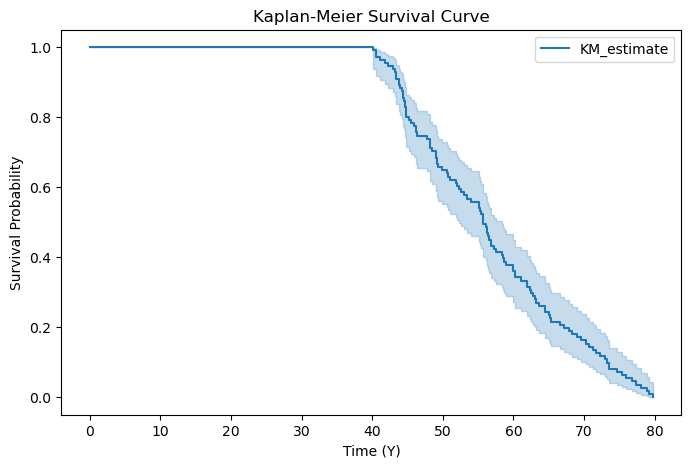

In [15]:
#plot KM
plt.figure(figsize = (8,5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (Y)")
plt.ylabel("Survival Probability")
plt.show()

<lifelines.CoxPHFitter: fitted with 111 total observations, 0 right-censored observations>
             duration col = 'D_time_d_int_Y'
                event col = 'D_occur'
      baseline estimation = breslow
   number of observations = 111
number of events observed = 111
   partial log-likelihood = -393.73
         time fit was run = 2025-02-23 12:24:56 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
Age       -0.07      0.93      0.01           -0.09           -0.05                0.91                0.95
HB_Level   0.03      1.03      0.06           -0.09            0.15                0.92                1.17
WBC_Count -0.04      0.96      0.05           -0.13            0.06                0.87                1.06

           cmp to     z      p  -log2(p)
covariate                               
Age          0.00 -6.54 <0.005     33.94
HB_Level     0.00  0.54   0.59      0.77
WBC_Count    0.00 -0.75   0.45      1.15
---
Concordance = 0.68
Partial AIC = 793.45
log-likelihood ratio test = 42.61 on 3 df
-log2(p) of ll-ratio test = 28.33

<Axes: xlabel='log(HR) (95% CI)'>

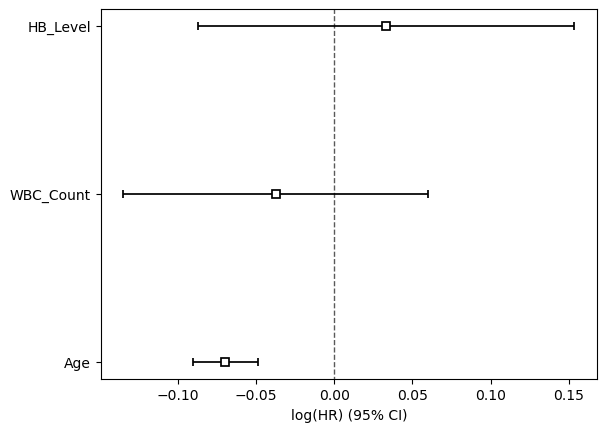

In [83]:
#Concept: Used for time-to-event analysis.

#Question 6:
#Using the asthma survival dataset, predict the impact of lab results on survival time.

#Task: Fit a Cox proportional hazards model.
#Bonus: Interpret hazard ratios.

# Select variables for Cox regression

df_cox = db_combined[["D_time_d_int_Y", "D_occur", "Age", "HB_Level", "WBC_Count"]].copy()

# Fit Cox model
cph = CoxPHFitter()
cph.fit(df_cox, duration_col="D_time_d_int_Y", event_col="D_occur")

# Summary of results
cph.print_summary()
cph.plot()

In [19]:
# Concept: Predict a continuous variable based on one or more independent variables.
# predict with linear regression 
# fit linear regression model to predict FEV1 levels based on age, blood pressure and hemoglobin

X = db_combined[["Age", "HB_Level", "WBC_Count"]]
y = db_combined["FEV1_Level"]

#split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#Get predictions
model = LinearRegression()
model.fit(X_train,y_train)

# Calculate evaluation metrics
y_pred = model.predict(X_test)

# create dataframe of actual and predicted values
predictions_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(predictions_df.head())

#calculate evaluation metrics 
r2 = r2_score(y_test,y_pred)

print(r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
#print(model.summary())

#for feature, coef in zip(X.columns, model.coef_):
#    print(f"{feature}: {coef}")

   Actual  Predicted
0    52.5  83.885333
1    57.4  82.380667
2   103.4  80.476972
3   113.9  82.411984
4    98.0  79.749131
-0.08131194676099396
Coefficients: [-0.15531055 -0.00136261 -0.16146509]
Intercept: 94.71358538599151


Accuracy: 0.5652


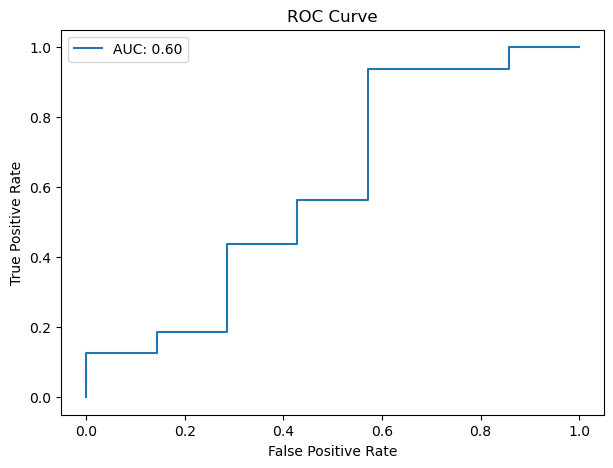

In [43]:
#Concept: Used for binary classification.
# You have a dataset where patients are labeled as "Asthma Diagnosed" (1) or "No Asthma" (0).
# Task: Build a logistic regression model to predict asthma diagnosis using available lab results and demographics.
# Bonus: Use a ROC curve to evaluate performance.
###
# Convert target variable to binary (1 = asthma diagnosed, 0 = not diagnosed)
db_combined["Asthma_Diagnosed"] = db_combined["Asthma_Diagnosis_Date"].notnull().astype(int)

# Select features
X = db_combined[["Age", "HB_Level", "WBC_Count"]]
y = db_combined["Asthma_Diagnosed"]

# ✅ Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select features
X = db_combined[["Age", "HB_Level", "WBC_Count"]]
y = db_combined["Asthma_Diagnosed"]

# Train logistic regression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

# Predict and Evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#print accuracy 
print(f"Accuracy: {accuracy:.4f}")
#print(accuracy)

# ✅ ROC Curve
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Ridge Regression:
R² Score: -0.0813
MSE: 312.7653

Lasso Regression:
R² Score: -0.0785
MSE: 311.9598


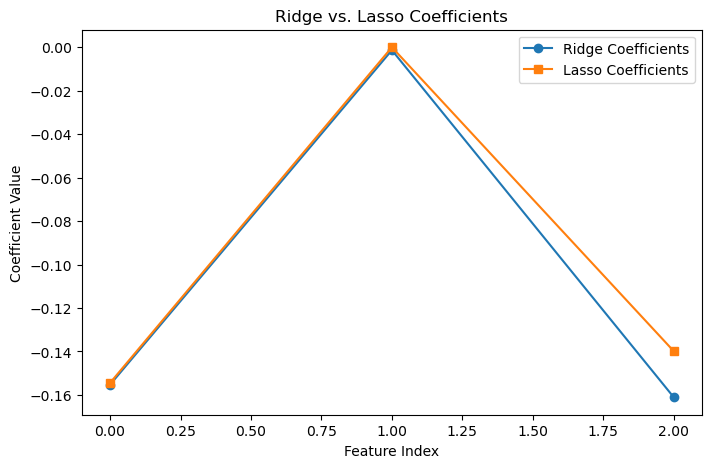

In [53]:
#Concept: Regularization techniques to prevent overfitting.
#Question 3:
#You suspect that some features in your dataset are highly correlated.

#Task: Train both Ridge and Lasso regression models and compare their performance.
#Bonus: Identify which features are reduced to zero by Lasso.

# ✅ Split into training and test sets
# Select features and target
X = db_combined[["Age", "HB_Level", "WBC_Count"]]
y = db_combined["FEV1_Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Train Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# ✅ Calculate R² and MSE for Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# ✅ Calculate R² and MSE for Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print R² and MSE
print("Ridge Regression:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")

print("\nLasso Regression:")
print(f"R² Score: {r2_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")

# Compare Ridge vs Lasso Coefficients
plt.figure(figsize=(8, 5))
plt.plot(ridge.coef_, label="Ridge Coefficients", marker='o')
plt.plot(lasso.coef_, label="Lasso Coefficients", marker='s')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs. Lasso Coefficients")
plt.legend()
plt.show()

In [65]:
#Concept: Used when relationships between variables are non-linear.

#Question 4:
#You suspect that FEV1 levels are not linearly related to patient age.

#Task: Fit a polynomial regression model.
#Bonus: Compare MSE of linear vs polynomial models.

X = db_combined[["Age", "HB_Level", "WBC_Count"]]
y = db_combined["FEV1_Level"]

#split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Train polynomial regression
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(poly.transform(X_test))
print("MSE (Polynomial Regression):", mean_squared_error(y_test, y_pred_poly))

MSE (Polynomial Regression): 315.11617646265955


In [73]:
#Concept: Used for count data (e.g., number of hospital visits).
#Question 5:
#A hospital tracks the number of asthma attacks per patient.
#Task: Fit a Poisson regression model to predict attack counts based on patient features.

#import statsmodels.api as sm

# Generate a synthetic count variable
db_combined["Asthma_Attacks"] = np.random.poisson(lam=3, size=len(db_combined))

# Fit Poisson regression
X = sm.add_constant(db_combined[["Age", "HB_Level", "WBC_Count"]])
y = db_combined["Asthma_Attacks"]
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Asthma_Attacks   No. Observations:                  111
Model:                            GLM   Df Residuals:                      107
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -220.30
Date:                Sun, 23 Feb 2025   Deviance:                       135.52
Time:                        13:50:25   Pearson chi2:                     116.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01911
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8496      0.651      1.304      0.1

Accuracy: 0.6957


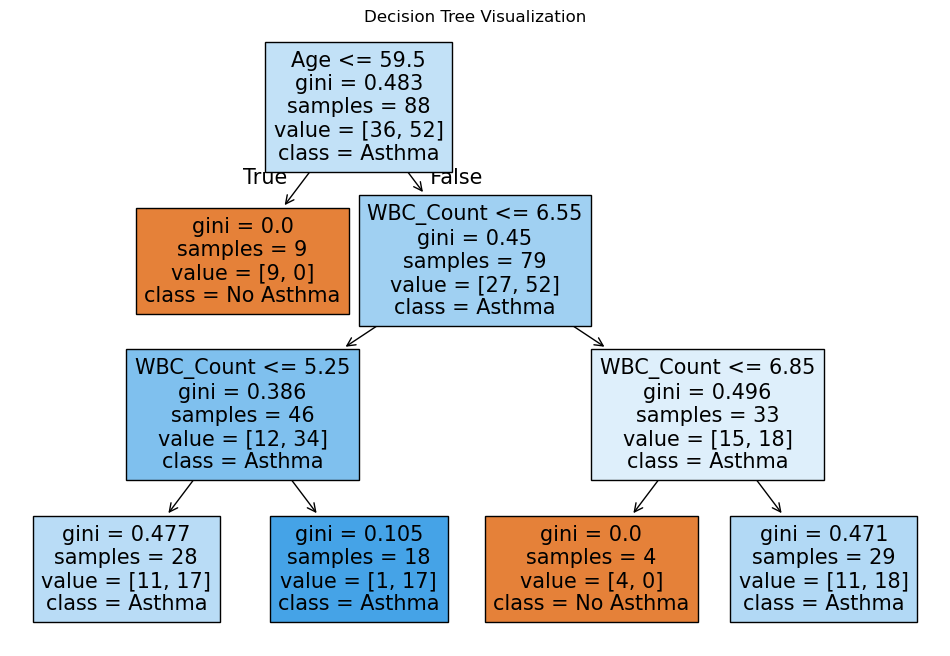


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.74      0.88      0.80        16

    accuracy                           0.70        23
   macro avg       0.62      0.58      0.58        23
weighted avg       0.66      0.70      0.67        23


Confusion Matrix:
[[ 2  5]
 [ 2 14]]


In [101]:
#Train a Decision Tree Classifier
#predict Asthma dx based on features
#We will use a dataset where we classify asthma diagnosis (Yes/No) based on patient characteristics.

# Select features and target
X = db_combined[["Age", "HB_Level", "WBC_Count"]]
y = db_combined["Asthma_Diagnosed"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["No Asthma", "Asthma"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



In [107]:
# Define hyperparameters to tune
param_grid = {
    "max_depth": [2, 3, 5, 10],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}

# Grid Search with Cross Validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)

# Print new accuracy
print(f"Optimized Decision Tree Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")

feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}
Optimized Decision Tree Accuracy: 0.7391
Age          0.513121
WBC_Count    0.486879
HB_Level     0.000000
dtype: float64


In [119]:
#data preparation

# Select features and target
X = db_combined[["Age", "HB_Level", "WBC_Count"]]
y = db_combined["Asthma_Diagnosed"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features (needed for some algorithms like SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [121]:
# Logistic regression as classification

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.5652173913043478
              precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.71      0.62      0.67        16

    accuracy                           0.57        23
   macro avg       0.52      0.53      0.52        23
weighted avg       0.60      0.57      0.58        23



In [123]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6956521739130435
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.74      0.88      0.80        16

    accuracy                           0.70        23
   macro avg       0.62      0.58      0.58        23
weighted avg       0.66      0.70      0.67        23



In [127]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6086956521739131
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.73      0.69      0.71        16

    accuracy                           0.61        23
   macro avg       0.55      0.56      0.55        23
weighted avg       0.62      0.61      0.62        23



In [131]:
#Support Vector Machine (SVM)

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6956521739130435
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.76      0.81      0.79        16

    accuracy                           0.70        23
   macro avg       0.63      0.62      0.62        23
weighted avg       0.68      0.70      0.69        23



In [133]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6086956521739131
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.73      0.69      0.71        16

    accuracy                           0.61        23
   macro avg       0.55      0.56      0.55        23
weighted avg       0.62      0.61      0.62        23



In [135]:
#Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6521739130434783
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.75      0.75      0.75        16

    accuracy                           0.65        23
   macro avg       0.59      0.59      0.59        23
weighted avg       0.65      0.65      0.65        23



In [137]:
# Gradient Boosting classifier 
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.6521739130434783
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.75      0.75      0.75        16

    accuracy                           0.65        23
   macro avg       0.59      0.59      0.59        23
weighted avg       0.65      0.65      0.65        23



C:\Users\Olga_\AppData\Local\Temp\ipykernel_40896\150496178.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


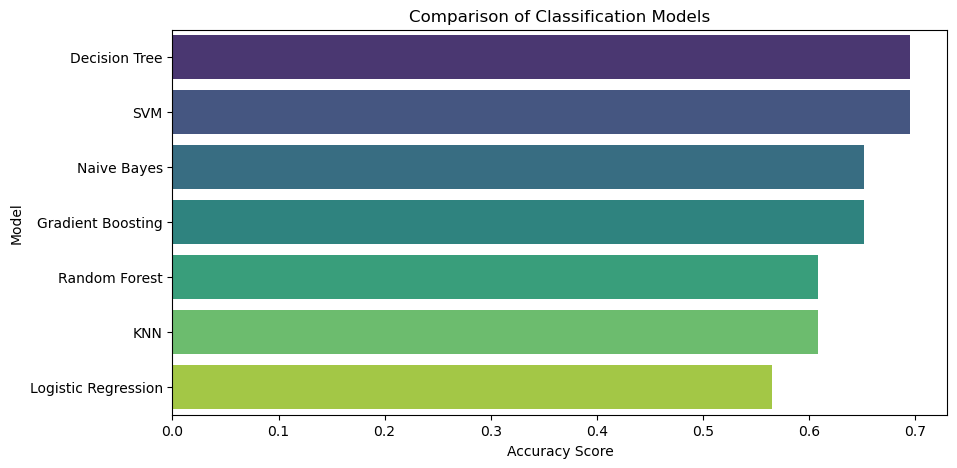

In [143]:
#compare model performance  

# Store results in a dictionary
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

# Convert to DataFrame for visualization
results_df = pd.DataFrame(models.items(), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)

# Plot model comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Comparison of Classification Models")
plt.show()

In [169]:
## Federated Leraning
#split dataset to create federated samples
#X_hosp1, X_temp, y_hosp1, y_temp = train_test_split(X, y, test_size=0.66, random_state=42)
#X_hosp2, X_hosp3, y_hosp2, y_hosp3 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Train Local Models at Each Hospital
# Each hospital trains a model on its own dataset without sending raw data to a central server.
# Initialize a list to store trained models

# Step 2
dfs = [df1, df2, df3]

models = []
# Train a Logistic Regression model for each hospital
for i, df in enumerate(dfs):
    df['Asthma_Diagnosed'] = df['Asthma_Diagnosis_Date'].notna().astype(int)
    # Define features (X) and target variable (y)
    X_hosp = df[["Age", "HB_Level", "WBC_Count"]]
    y_hosp = df["Asthma_Diagnosed"]

    # Train Logistic Regression model
    model = LogisticRegression()
    model.fit(X_hosp, y_hosp)
    
    # Store trained model
    models.append(model)
    print(f"✅ Hospital {i+1} Model Trained Successfully")

print("🎯 All hospital models trained successfully.")



✅ Hospital 1 Model Trained Successfully
✅ Hospital 2 Model Trained Successfully
✅ Hospital 3 Model Trained Successfully
🎯 All hospital models trained successfully.


In [209]:
#Step 3 Global model
# Collect model weights from all hospitals
model_weights = [model.coef_ for model in models]
model_intercepts = [model.intercept_ for model in models]

# Compute Federated Averaging (FedAvg) - Aggregate the model weights
fedavg_weights = np.mean(model_weights, axis=0)
fedavg_intercept = np.mean(model_intercepts, axis=0)

#Compute Weighted FedAvg for model weights and intercepts
#weighted_fedavg_weights = np.sum([model_weights[i] * num_samples[i] for i in range(len(models))], axis=0) / np.sum(num_samples)
#weighted_fedavg_intercept = np.sum([model_intercepts[i] * num_samples[i] for i in range(len(models))], axis=0) / np.sum(num_samples)

# Apply the aggregated weights to a new global model
global_model = LogisticRegression()
global_model.coef_ = fedavg_weights
global_model.intercept_ = fedavg_intercept

print("Global Model Aggregated using FedAvg")


Global Model Aggregated using FedAvg


In [219]:
#Before assigning weights manually, we need to train the global_model on some dummy data. This ensures that classes_ and other necessary attributes are initialized.
# Extract model coefficients and intercepts from each trained hospital model
model_weights = [model.coef_ for model in models]
model_intercepts = [model.intercept_ for model in models]

# Compute Federated Averaging (FedAvg)
fedavg_weights = np.mean(model_weights, axis=0)
fedavg_intercept = np.mean(model_intercepts, axis=0)

# ✅ Step 1: Initialize the global model properly with dummy training
X_dummy = np.zeros((2, fedavg_weights.shape[1]))  # Dummy data
y_dummy = np.array([0, 1])  # Dummy labels

global_model = LogisticRegression()
global_model.fit(X_dummy, y_dummy)  # Train on dummy data to initialize `classes_`

# ✅ Step 2: Manually set the trained parameters
global_model.coef_ = np.array(fedavg_weights)
global_model.intercept_ = np.array(fedavg_intercept)

print("✅ Global Model Aggregated using Federated Averaging (FedAvg).")


✅ Global Model Aggregated using Federated Averaging (FedAvg).


In [223]:
# Step 4: Compare Local vs. Global Model Performance
# Now we evaluate whether the global model performs better than local models.
#display(df)
X_test = df[["Age", "HB_Level", "WBC_Count"]]  # Features
y_test = df["Asthma_Diagnosed"]  # Target variable

# Evaluate Local Models (models[0], models[1], models[2] correspond to hospital models)
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    print(f"🏥 Hospital {i+1} Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Evaluate Global Model (Federated Model)
#y_pred_global = global_model.predict(X_test)
#print(f"🌍 Global Model Accuracy: {accuracy_score(y_test, y_pred_global):.4f}")

try:
    y_pred_global = global_model.predict(X_test)
    print(f"🌍 Global Model Accuracy: {accuracy_score(y_test, y_pred_global):.4f}")
except Exception as e:
    print(f"❌ Error evaluating Global Model: {e}")

🏥 Hospital 1 Model Accuracy: 0.6886
🏥 Hospital 2 Model Accuracy: 0.6916
🏥 Hospital 3 Model Accuracy: 0.6826
🌍 Global Model Accuracy: 0.6856


C:\Users\Olga_\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


C:\Users\Olga_\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Olga_\AppData\Local\Temp\ipykernel_40896\901182369.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


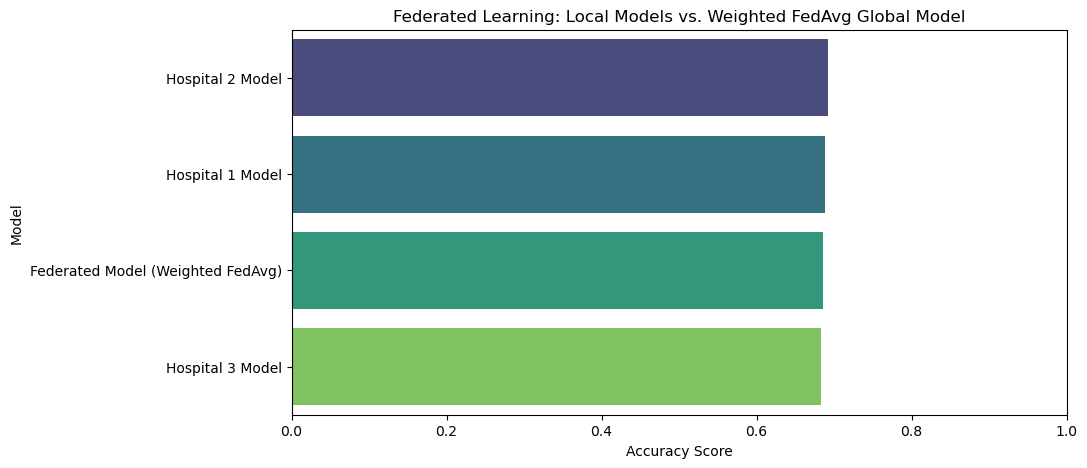

In [225]:
#Visualization as bar chrts
# Store accuracy results in a dictionary
results = {
    "Hospital 1 Model": accuracy_score(y_test, models[0].predict(X_test)),
    "Hospital 2 Model": accuracy_score(y_test, models[1].predict(X_test)),
    "Hospital 3 Model": accuracy_score(y_test, models[2].predict(X_test)),
    "Federated Model (Weighted FedAvg)": accuracy_score(y_test, global_model.predict(X_test))
}

# Convert to DataFrame for visualization
results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)

# Plot performance comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Federated Learning: Local Models vs. Weighted FedAvg Global Model")
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

In [252]:
#Load & Prepare Federated Dataset
#Since federated learning requires decentralized data, we will simulate multiple clients.

#For this example, let's assume each hospital has its own dataset.
# Convert hospital data to TensorFlow Datasets
print(df3.dtypes)
df1N = df1[["Age","HB_Level","WBC_Count","FEV1_Level","Asthma_Diagnosed"]]
df2N = df2[["Age","HB_Level","WBC_Count","FEV1_Level","Asthma_Diagnosed"]]
df3N = df3[["Age","HB_Level","WBC_Count","FEV1_Level","Asthma_Diagnosed"]]

federated_train_data = [
    create_tf_dataset(df1N),
    create_tf_dataset(df2N),
    create_tf_dataset(df3N)
]
print("✅ Federated dataset created.")

Gender                                 object
Age                                     int64
Birth_Date                             object
Death_Date                             object
Last_Observation_Date                  object
Asthma_Diagnosis_Date                  object
HB_Level                              float64
WBC_Count                             float64
FEV1_Level                            float64
COPD_Diagnosis_Date                    object
Obesity_Diagnosis_Date                 object
Hypertension_Diagnosis_Date            object
GERD_Diagnosis_Date                    object
Diabetes_Diagnosis_Date                object
Wheezing_Diagnosis_Date                object
Shortness of breath_Diagnosis_Date     object
Cough_Diagnosis_Date                   object
Chest tightness_Diagnosis_Date         object
Asthma_Diagnosed                        int32
dtype: object
✅ Federated dataset created.


C:\Users\Olga_\AppData\Local\Temp\ipykernel_40896\3389848050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_data[key] = np.array(hospital_data[key], dtype=np.float32)  # Ensure numeric format
C:\Users\Olga_\AppData\Local\Temp\ipykernel_40896\3389848050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_data[key] = np.array(hospital_data[key], dtype=np.float32)  # Ensure numeric format
C:\Users\Olga_\AppData\Local\Temp\ipykernel_40896\3389848050.py:12: SettingWithCopyWarning: 
A val

In [292]:
#Step 3: Define Deep Learning Model (Neural Network)
#We will define a simple Neural Network (NN) classifier for asthma diagnosis.

def create_dnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),  # 4 features
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [294]:
#Step 4: Train Local Models at Each Hospital
#Each hospital trains its own model locally.
def train_local_model(df, epochs=10):
    X = df[["Age", "HB_Level", "WBC_Count", "FEV1_Level"]]
    y = df["Asthma_Diagnosed"]

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train model
    model = create_dnn_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    # Evaluate local model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"🏥 Hospital Model Accuracy: {accuracy:.4f}")
    
    return model, scaler  # Return trained model and scaler

In [296]:
# Train local models at each hospital
local_model_1, scaler_1 = train_local_model(df1)
local_model_2, scaler_2 = train_local_model(df2)
local_model_3, scaler_3 = train_local_model(df3)

print("✅ Local models trained successfully.")

C:\Users\Olga_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🏥 Hospital Model Accuracy: 0.6418


C:\Users\Olga_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🏥 Hospital Model Accuracy: 0.6418


C:\Users\Olga_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🏥 Hospital Model Accuracy: 0.6716
✅ Local models trained successfully.


In [300]:
#Step 5: Aggregate Models Using Federated Averaging (FedAvg)
def federated_averaging(models):
    new_model = create_dnn_model()
    model_weights = [model.get_weights() for model in models]
    
    # Compute Federated Averaging
    avg_weights = [np.mean(weights, axis=0) for weights in zip(*model_weights)]
    
    # Set the averaged weights to the new global model
    new_model.set_weights(avg_weights)
    
    return new_model

# Compute the global model
global_model = federated_averaging([local_model_1, local_model_2, local_model_3])
print("✅ Global Federated Model Created using FedAvg.")

✅ Global Federated Model Created using FedAvg.


C:\Users\Olga_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [304]:
def generate_data(num_samples):
    np.random.seed(42)
    age = np.random.randint(30, 80, size=num_samples)
    hb_level = np.random.uniform(10, 18, size=num_samples)
    wbc_count = np.random.uniform(4, 11, size=num_samples)
    fev1_level = np.random.uniform(50, 100, size=num_samples)
    asthma_diagnosed = np.random.randint(0, 2, size=num_samples)  # Binary labels

    df = pd.DataFrame({
        "Age": age,
        "HB_Level": hb_level,
        "WBC_Count": wbc_count,
        "FEV1_Level": fev1_level,
        "Asthma_Diagnosed": asthma_diagnosed
    })
    return df

# Create datasets for 3 hospitals
#df1 = generate_data(500)  # Hospital 1
#df2 = generate_data(700)  # Hospital 2
#df3 = generate_data(600)  # Hospital 3

print("✅ Federated datasets created.")

✅ Federated datasets created.


In [306]:
# Generate new patient data
test_data = generate_data(200)

X_test = test_data[["Age", "HB_Level", "WBC_Count", "FEV1_Level"]]
y_test = test_data["Asthma_Diagnosed"]

# Normalize using one of the hospital scalers
X_test = scaler_1.transform(X_test)  # Use Hospital 1 scaler

# Predict asthma probability
predictions = global_model.predict(X_test)

# Convert probabilities to binary labels
predicted_labels = (predictions > 0.5).astype(int)

# Evaluate Global Model Accuracy
accuracy = np.mean(predicted_labels.flatten() == y_test)
print(f"🌍 Global Model Accuracy on New Patients: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
🌍 Global Model Accuracy on New Patients: 0.5200


In [308]:
getcwd()

NameError: name 'getcwd' is not defined

In [256]:
###not working 
#Step 4: Convert Keras Model to Federated Learning Model
#Since TensorFlow Federated (TFF) requires models in a special format, we need to convert the Keras model.
def model_fn():
    keras_model = create_keras_model()
    return tff.learning.from_keras_model(
        keras_model,
        input_spec=federated_train_data[0].element_spec,
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )


In [278]:
### not working
#Step 5: Federated Learning Training using FedAvg
#Now, we define Federated Averaging (FedAvg) for training.

# Federated Learning process
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.01),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.01)
)

# Initialize Federated Model
state = iterative_process.initialize()

print("✅ Federated Learning Model Initialized.")


NameError: name 'tff' is not defined